In [1]:
from gridworld_pa1 import world, plot_Q, seq_to_col_row, row_col_to_seq
import numpy as np
from IPython.display import clear_output
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
#same actions are used for plotting the Q value graph
DOWN = 1
UP = 0
LEFT = 2
RIGHT = 3
actions = [DOWN, UP, LEFT, RIGHT]

Number of actions 4
Number of states 100
start state [4]
goal state(s) [ 9 22 87]


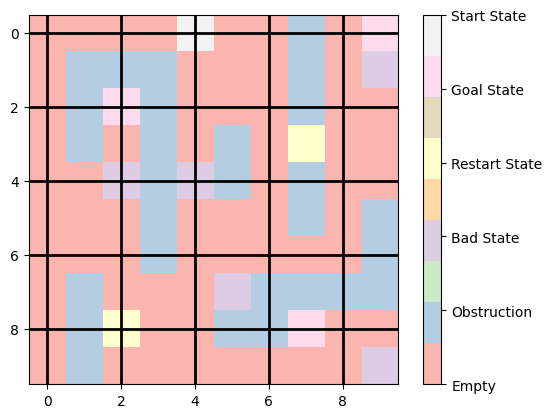

In [3]:
#choose number 0 to 5 to enter a argument for world number
env  = world(world_num = 1)
print("Number of actions", env.num_actions) #0 -> UP, 1-> DOWN, 2 -> LEFT, 3-> RIGHT
print("Number of states", env.num_states)
print("start state", env.start_state_seq)
print("goal state(s)", env.goal_states_seq)
env.render_world()

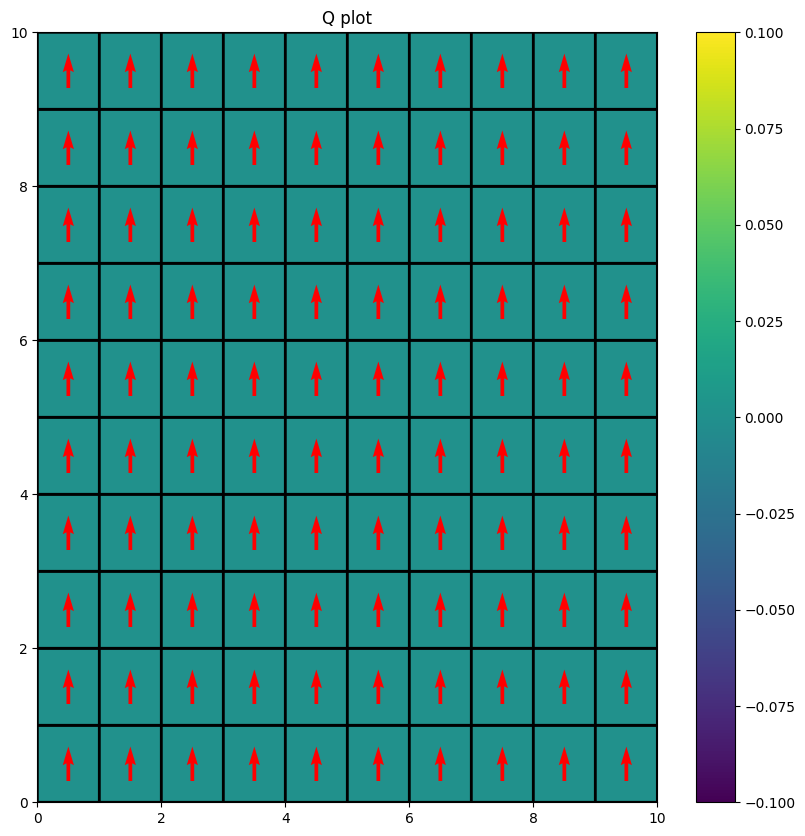

(100, 4)

In [4]:
#plot Q value
Q = np.zeros((env.num_states, env.num_actions))
plot_Q(Q)
Q.shape

In [5]:
from scipy.special import softmax

seed = 42
rg = np.random.RandomState(seed)

# Softmax
def choose_action_softmax(Q, state, rg=rg):
    a = [0,1,2,3]
    tau = 0.5
    sfm_Q = np.asarray([np.exp(Q[state,i]/tau) for i in a])
    sfm_Q = sfm_Q/sum(sfm_Q)
    action = np.random.choice(len(sfm_Q), p = sfm_Q)
    return action


In [6]:
alpha0 = 0.4
gamma = 0.9
episodes = 10000

In [7]:
print_freq = 100
            
def sarsa(env, Q, gamma=0.9, plot_heat=False, choose_action = choose_action_softmax):
    episode_rewards = np.zeros(episodes)
    steps_to_completion = np.zeros(episodes)
    if plot_heat:
        clear_output(wait=True)
        plot_Q(Q)
    alpha = alpha0
    for ep in tqdm(range(episodes)):
        tot_reward, steps = 0, 0
        
        # Reset environment
        state = env.reset()
        action = choose_action(Q, state)
        while True:
            state_next, reward = env.step(state=state, action=action)
            action_next = choose_action(Q, state_next)
            
            # Update equation for SARSA
            Q[state, action] += alpha * (reward + gamma * Q[state_next, action_next] - Q[state, action])
            
            tot_reward += reward
            steps += 1
            
            state, action = state_next, action_next

            if state in env.goal_states_seq:
                break
        
        episode_rewards[ep] = tot_reward
        steps_to_completion[ep] = steps
        
        if (ep+1) % print_freq == 0 and plot_heat:
            clear_output(wait=True)
            plot_Q(Q, message="Episode %d: Reward: %f, Steps: %.2f, Qmax: %.2f, Qmin: %.2f" % (ep+1, np.mean(episode_rewards[ep-print_freq+1:ep]),
                                                                                             np.mean(steps_to_completion[ep-print_freq+1:ep]),
                                                                                             Q.max(), Q.min()))
                
    return Q, episode_rewards, steps_to_completion

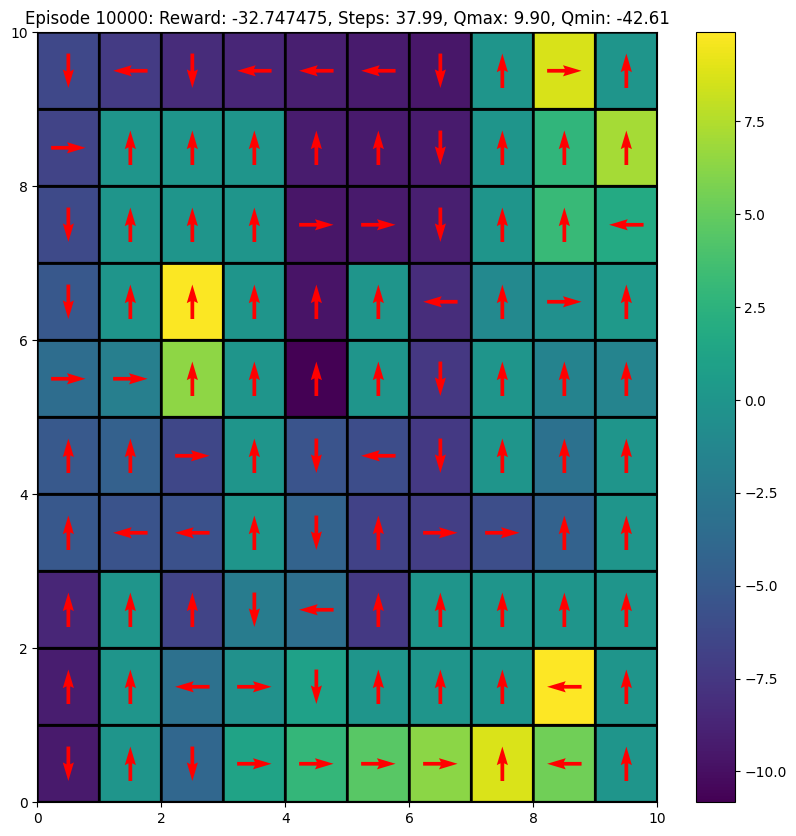

100%|██████████| 10000/10000 [00:39<00:00, 251.32it/s]


In [8]:
Q, rewards, steps = sarsa(env, Q, gamma = gamma, plot_heat=True, choose_action= choose_action_softmax)

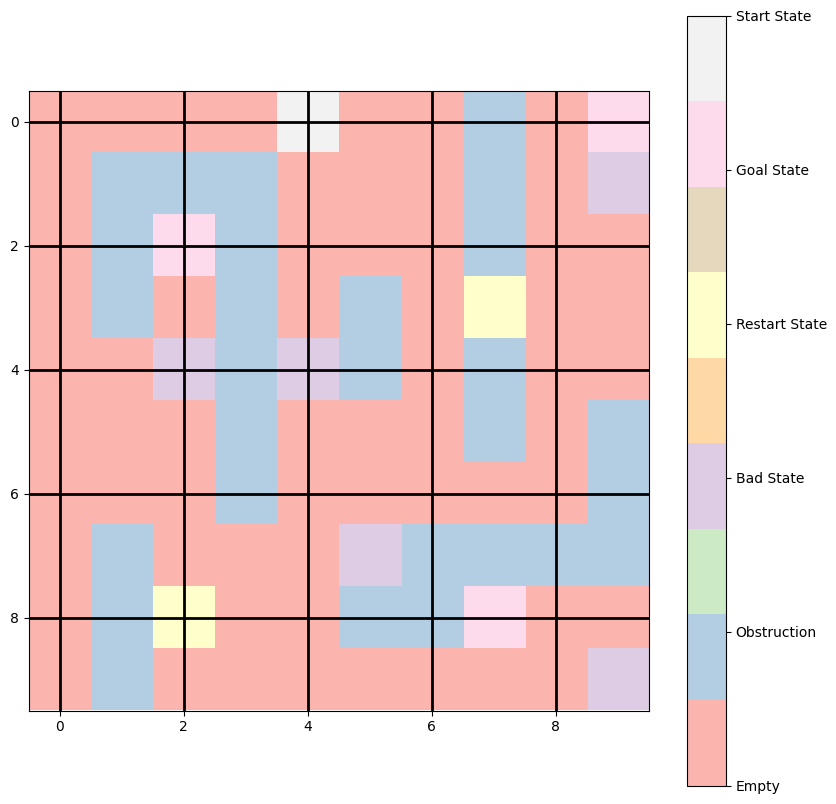

KeyboardInterrupt: 

In [9]:
from time import sleep

state = env.reset()
done = False
steps = 0
tot_reward = 0

while not done:
    clear_output(wait=True)
    state, reward= env.step(state,Q[state].argmax())
    plt.figure(figsize=(10, 10))
    env.render_state(state)
    plt.show()
    steps += 1
    tot_reward += reward
    sleep(0.2)
print("Steps: %d, Total Reward: %d"%(steps, tot_reward))